In [ ]:
import torch
low_limit = 0
high_limit = 10

n_tokens = 8
n_special_tokens = 2


centers = torch.linspace(
    low_limit,
    high_limit,
    n_tokens - n_special_tokens - 1,
)


boundaries = torch.concat(
    (
        torch.tensor([-1e20], device=centers.device),
        (centers[1:] + centers[:-1]) / 2,
        torch.tensor([1e20], device=centers.device),
    )
)



In [ ]:
print(centers.device)

In [ ]:
print(centers)

In [ ]:
print(boundaries)

In [ ]:
print(centers[1:])

In [ ]:
print(centers[:-1])

In [ ]:
cwnan = torch.concat([centers, torch.tensor([float('nan')])])
print(torch.nansum(cwnan, dim = -1) )
print(cwnan)

In [ ]:
context = torch.tensor([0,0,0,0,0,0,0,0,9,10])
attention_mask = torch.tensor([1,1,1,1,1,1,1,1,0,0])

scale = torch.nansum(
    torch.abs(context) * attention_mask, dim=-1
) / torch.nansum(attention_mask, dim=-1)
scale[~(scale > 0)] = 1.0
print(torch.abs(context) * attention_mask)
print(context.unsqueeze(dim= -1))
scale

In [ ]:
batch_size = context.shape[0]
temp = torch.full( (batch_size,1), fill_value = 4)
print(context)
print(batch_size)
print(temp)
print(temp.ndim)

In [53]:
import torch
import pandas as pd
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

df = pd.concat([df]*20, ignore_index=True)

print(len(df))
print('#'*20)
print(df.iloc[0])
print('#'*20)
print(df.iloc[int(len(df)/2)])
print('#'*20)
df.head()


2880
####################
Month          1949-01
#Passengers        112
Name: 0, dtype: object
####################
Month          1949-01
#Passengers        112
Name: 1440, dtype: object
####################


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [57]:
context = torch.tensor(df["#Passengers"])
print(context.shape)


torch.Size([2880])


In [58]:
embeddings, tokenizer_state = pipeline.embed(context)

print(embeddings.shape)
print(embeddings)

torch.Size([1, 513, 512])
tensor([[[ 0.0693, -0.0708,  0.0146,  ...,  0.0588,  0.0238, -0.0083],
         [ 0.0688, -0.0359,  0.0398,  ..., -0.0074,  0.0170,  0.0168],
         [ 0.0101, -0.0248,  0.0337,  ..., -0.0280, -0.0024,  0.0376],
         ...,
         [ 0.0588,  0.0215, -0.0065,  ..., -0.0708,  0.0033,  0.0294],
         [-0.0562, -0.0408, -0.0190,  ..., -0.0549, -0.0077,  0.0557],
         [-0.0068,  0.0152, -0.0117,  ...,  0.0371, -0.0283,  0.0413]]],
       dtype=torch.bfloat16)


In [ ]:
tokenizer_state

In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google-t5/t5-small")
model = T5ForConditionalGeneration.from_pretrained("google-t5/t5-small")

# the following 2 hyperparameters are task-specific

max_source_length = 512

max_target_length = 128

# Suppose we have the following 2 training examples:

input_sequence_1 = "translate English to French: Welcome to the internet have a little fun. Everything the little brain of yours can think of can be found on the internet."

output_sequence_1 = "Bienvenue à NYC"

input_sequence_2 = "HuggingFace is a company"

output_sequence_2 = "HuggingFace est une entreprise"


task_prefix = "translate English to French: "

input_sequences = [input_sequence_1, input_sequence_2]

encoding = tokenizer(

    [task_prefix + sequence for sequence in input_sequences],

    padding="longest",

    max_length=max_source_length,

    truncation=True,

    return_tensors="pt",

)

input_ids, attention_mask = encoding.input_ids, encoding.attention_mask

# encode the targets

target_encoding = tokenizer(

    [output_sequence_1, output_sequence_2],

    padding="longest",

    max_length=max_target_length,

    truncation=True,

    return_tensors="pt",

)

labels = target_encoding.input_ids

labels[labels == tokenizer.pad_token_id] = -100



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [12]:
from transformers import T5Tokenizer, T5Model

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5Model.from_pretrained("t5-small")

input_ids = tokenizer(
    "Studies have been shown that owning a dog is good for you", return_tensors="pt"
).input_ids  # Batch size 1

input_ids.size()

/home/lsmo/anaconda3/envs/procGen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


torch.Size([1, 15])

In [25]:
import lipsum
import torch
from transformers import T5Tokenizer, T5EncoderModel

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small", output_hidden_states=True)

paragraph = lipsum.generate_paragraphs(1)
print('number of words',len(paragraph.split(' ')))
print('number of chars',len(paragraph))

input_ids = tokenizer(
    paragraph, return_tensors="pt"
).input_ids  # Batch size 1

input_ids.size()

# Get all hidden states
with torch.no_grad():  # Disable gradient calculation
    outputs = model(input_ids)
    all_hidden_states = outputs.hidden_states

print('input token IDs',input_ids.size())
print('Number of hidden states',len(all_hidden_states)) 
print('the size of the last hidden state', all_hidden_states[-1].size())  # (batch_size, sequence_length, hidden_size)



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


number of words 35
number of chars 225
input token IDs torch.Size([1, 111])
Number of hidden states 7
the size of the last hidden state torch.Size([1, 111, 512])


In [52]:
from pathlib import Path
from typing import List, Union

import numpy as np
from gluonts.dataset.arrow import ArrowWriter


def convert_to_arrow(
    path: Union[str, Path],
    time_series: Union[List[np.ndarray], np.ndarray],
    compression: str = "lz4",
):
    """
    Store a given set of series into Arrow format at the specified path.

    Input data can be either a list of 1D numpy arrays, or a single 2D
    numpy array of shape (num_series, time_length).
    """
    assert isinstance(time_series, list) or (
        isinstance(time_series, np.ndarray) and
        time_series.ndim == 2
    )

    # Set an arbitrary start time
    start = np.datetime64("2000-01-01 00:00", "s")

    dataset = [
        {"start": start, "target": ts} for ts in time_series
    ]

    ArrowWriter(compression=compression).write_to_file(
        dataset,
        path=path,
    )


# if __name__ == "__main__":
#     # Generate 20 random time series of length 1024
#     time_series = [np.random.randn(1024) for i in range(20)]

#     # Convert to GluonTS arrow format
#     convert_to_arrow("./noise-data.arrow", time_series=time_series)



Making a heat exchanger timeseries

Text(0.5, 1.0, 'Cold stream mass flow rate')

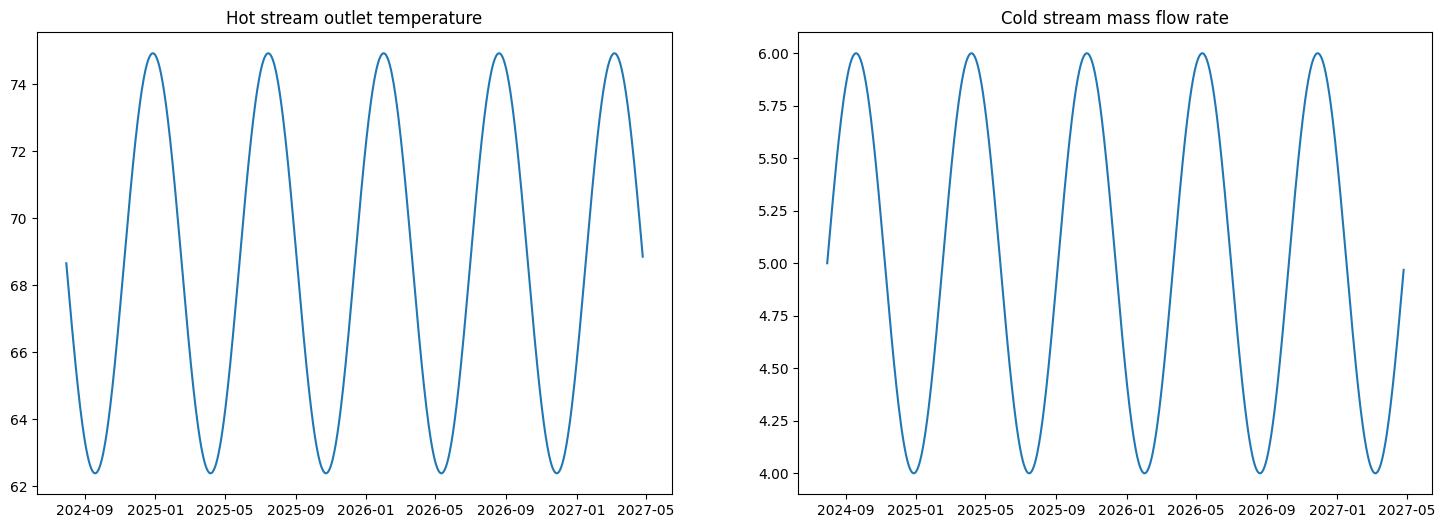

In [59]:
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


TCin = 15 + 273.15

TCout = 45 + 273.15

THin = 100 + 273.15

cpH = 2

cpC = 4.18



mdotCs = [5 + math.sin(i*math.pi/100) for i in range(1000) ]

mdotH = 10

THouts = [THin - (mdotC * cpC * (TCout - TCin))/(mdotH * cpH) - 273.15 for mdotC in mdotCs]


start_time = datetime.now()
timestamps = [start_time + timedelta(days=i) for i in range(len(mdotCs))]


plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1,2,1)
ax1.plot(timestamps, THouts)
ax1.set_title('Hot stream outlet temperature')
ax2 = plt.subplot(1,2,2)
ax2.plot(timestamps, mdotCs)
ax2.set_title('Cold stream mass flow rate')


making a heat exchanger text database

In [61]:
Text_database = [
'''
Heat exchangers are devices used to transfer heat between two or more fluids. There are several types of heat exchangers, and the mathematical formulas used to describe their performance can vary. Here are some key formulas and concepts commonly used in heat exchanger analysis.
The overall heat transfer rate in a heat exchanger can be calculated using:
Q = \dot{m}_h c_{p,h} (T_{h,in} - T_{h,out}) = \dot{m}_c c_{p,c} (T_{c,out} - T_{c,in})
Q: Heat transfer rate (W)
\dot{m}_h: Mass flow rate of the hot fluid (kg/s)
\dot{m}_c: Mass flow rate of the cold fluid (kg/s)
c_{p,h}: Specific heat capacity of the hot fluid (J/kg.K)
c_{p,c}: Specific heat capacity of the cold fluid (J/kg.K)
T_{h,in}: Inlet temperature of the hot fluid (K)
T_{h,out}: Outlet temperature of the hot fluid (K)
T_{c,in}: Inlet temperature of the cold fluid (K)
T_{c,out}: Outlet temperature of the cold fluid (K)

The inlet temperature of the hot fluid can be calculated using:
T_{h,in} = T_{h,out} + \frac{\dot{m}_c c_{p,c} (T_{c,out} - T_{c,in})}{\dot{m}_h c_{p,h}}

In a real system, the Mass flow rate of the cold liquid oscillate with time, this oscillation can be modeled as a sinusoidal function. All of the other parameters are constant. The hot stream is a liquid with a specific heat capacity of 2 J/kg.K and the cold stream is a liquid with a specific heat capacity of 4.18 J/kg.K. The hot stream enters the heat exchanger at 100°C and the cold stream enters at 15°C. The hot stream leaves the heat exchanger at 45°C. The mass flow rate of the hot stream is 10 kg/s. The mass flow rate of the cold stream oscillates between 4 kg/s and 6 kg/s. The heat exchanger is operating in steady-state conditions.
'''

]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_913512/4113403335.py:2: SyntaxWarning: invalid escape sequence '\d'
  '''


In [5]:
import torch
from transformers import T5Tokenizer, T5EncoderModel

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small", output_hidden_states=True)

input_ids = tokenizer(
    Text_database, return_tensors="pt"
).input_ids  # Batch size 1

input_ids.size()

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


NameError: name 'Text_database' is not defined

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Shape of attention scores: torch.Size([1, 8, 20, 20])
['▁translate', '▁English', '▁to', '▁French', ':', '▁Studies', '▁have', '▁been', '▁shown', '▁that', '▁own', 'ing', '▁', 'a', '▁dog', '▁is', '▁good', '▁for', '▁you', '</s>']
[[5.16899377e-02 5.80234500e-03 5.80323336e-04 5.75332111e-03
  3.38793476e-03 4.41140932e-04 9.11336450e-04 2.76508043e-04
  9.63791681e-04 3.77135380e-04 3.23027489e-04 2.77698564e-04
  2.50911835e-04 2.53656763e-04 4.95495915e-04 5.52839483e-04
  6.40254177e-04 3.67317291e-04 3.86861502e-04 9.26268220e-01]
 [9.85001087e-01 1.49969859e-02 7.58332597e-09 1.04475396e-06
  7.86909879e-08 2.50795829e-08 3.99374933e-08 1.11027916e-08
  4.69441055e-08 2.53311594e-08 8.90989948e-09 4.42963000e-09
  4.23939417e-09 4.52393722e-09 3.11822923e-08 1.38815475e-08
  4.97033916e-08 5.21585708e-09 4.63819703e-08 5.45029025e-07]
 [9.30944741e-01 6.80918321e-02 1.47844359e-04 1.50891428e-05
  3.71611022e-05 4.71679923e-05 9.27948568e-05 1.55251197e-04
  5.53799146e-05 6.10880161e

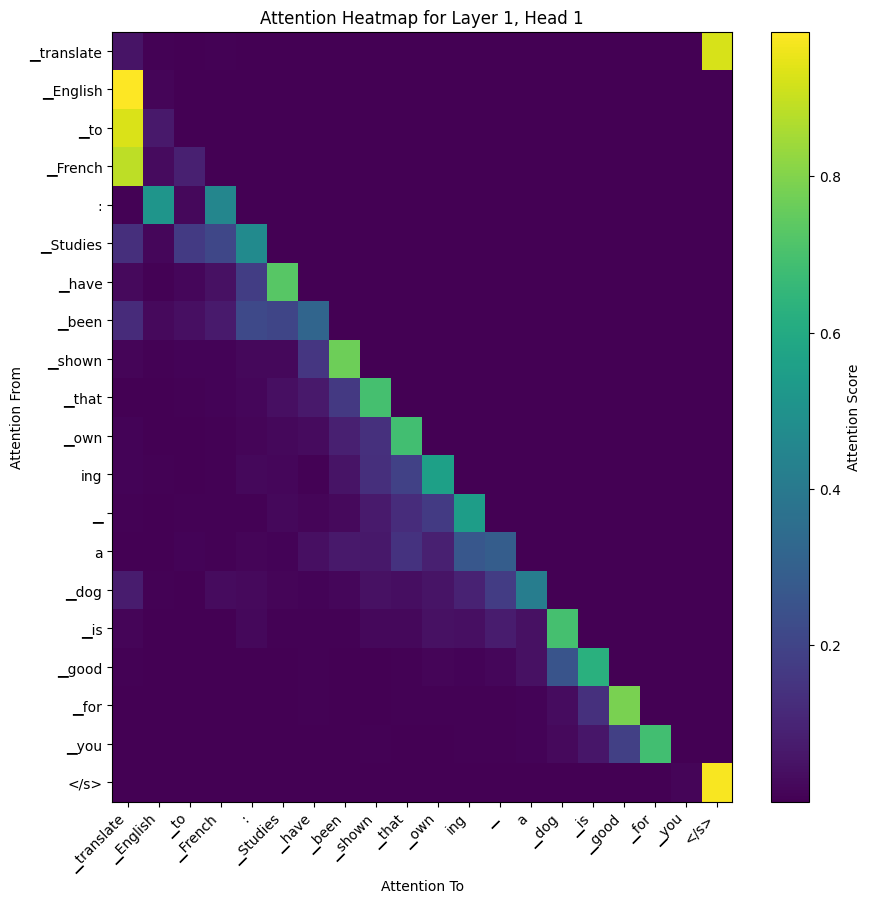

In [29]:
import torch
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, T5EncoderModel

# Load the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small", output_attentions=True)

# Tokenize input
input_text = "translate English to French: Studies have been shown that owning a dog is good for you"
inputs = tokenizer(input_text, return_tensors="pt")

# Forward pass to get the outputs and attentions
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions

# Extract the attention from the first layer and first head
attention_scores = attentions[0]  # (batch_size, num_heads, seq_length, seq_length)

# Print shape to verify
print(f"Shape of attention scores: {attention_scores.shape}")

# Get the first layer and head (0-indexed)
layer_index = 0
head_index = 0

# Ensure we extract a 2D matrix for visualization
attention_matrix = attention_scores[0][head_index].cpu().numpy()  # (seq_length, seq_length)

# Convert token IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0].tolist())

# Plotting function
def plot_attention(ax, attention_matrix, tokens, layer=0, head=0, cmap='viridis'):
    cax = ax.imshow(attention_matrix, cmap=cmap, aspect='auto')
    plt.colorbar(cax, ax=ax, label='Attention Score')
    ax.set_title(f'Attention Heatmap for Layer {layer+1}, Head {head+1}')
    ax.set_xlabel('Attention To')
    ax.set_ylabel('Attention From')
    
    # Set x and y axis labels
    ax.set_xticks(ticks=range(len(tokens)), labels=tokens, rotation=45, ha='right')
    ax.set_yticks(ticks=range(len(tokens)), labels=tokens)
    
# Plot attention heatmap for the first layer and first head
fig, ax = plt.subplots(figsize=(10, 10))
plot_attention(ax, attention_matrix, tokens)

print(tokens)
print(attention_matrix)

In [30]:
import src.chronos.chronos
import importlib
importlib.reload(src.chronos.chronos)

from src.chronos.chronos import ChronosPipeline
import torch
import pandas as pd

print(ChronosPipeline.from_pretrained.__code__)

pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

df = pd.concat([df], ignore_index=True)

context = torch.tensor(df["#Passengers"][:30])

embeddings, tokenizer_state = pipeline.embed(context)

print(embeddings.shape)


token_ids, attention_mask, tokens = (
    pipeline.get_context_input_transform(context)
)

print(token_ids.shape)

encoder_attentions, decoder_attentions, cross_attentions, encoder_last_hidden_state = pipeline.get_attention_scores(context)

<code object from_pretrained at 0x106bd7f0, file "/home/lsmo/Desktop/Files/1st Year/Project/chronos-forecasting/src/chronos/chronos.py", line 537>
torch.Size([1, 31, 512])
torch.Size([1, 31])


In [31]:
print(tokens[0][0][:-1].shape)
print(context.shape)
print((tokens[0][0][:-1] - context).tolist())
print(tokens[0][0][-1])

torch.Size([30])
torch.Size([30])
[0.41934967041015625, -0.470672607421875, -0.1627655029296875, -0.2287445068359375, -0.404693603515625, -0.096771240234375, 0.18914794921875, 0.18914794921875, -0.0747833251953125, -0.4486846923828125, 0.24340057373046875, -0.470672607421875, 0.48532867431640625, -0.2947235107421875, 0.035186767578125, -0.096771240234375, -0.31671905517578125, 0.211151123046875, -0.3489837646484375, -0.3489837646484375, 0.409088134765625, -0.140777587890625, 0.46334075927734375, 0.01318359375, 0.1231536865234375, 0.2331390380859375, -0.17303466796875, -0.5029449462890625, -0.30499267578125, -0.17303466796875]
tensor(-2091.)


torch.Size([1, 8, 31, 31])
torch.Size([1, 8, 20, 20])


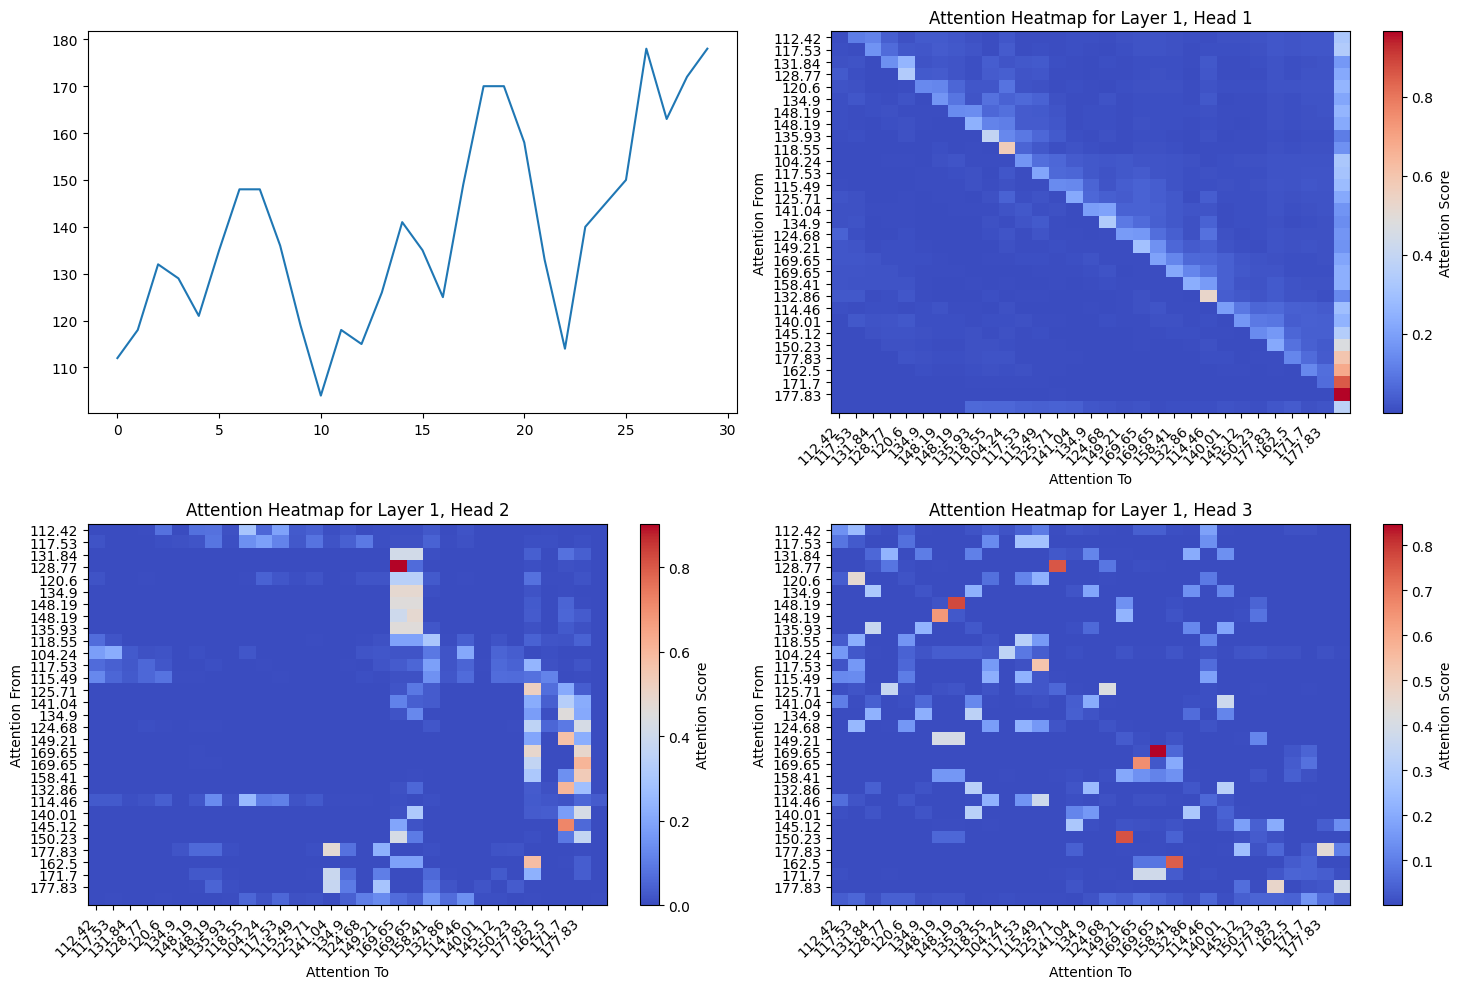

In [35]:
head_index = 0
batch_index = 0


rounded_tokens = [round(num, 2) for num in tokens[0][0][:-1].tolist()]

def get_attention_matrix(encoder_attentions, batch_index, head_index):
    
    attention_scores = encoder_attentions[0][batch_index][head_index]

    if attention_scores.dtype == torch.bfloat16:
        attention_scores = attention_scores.to(torch.float32)

    attention_matrix = attention_scores.cpu().numpy()  # (seq_length, seq_length)

    return attention_matrix

attention_matrix = get_attention_matrix(encoder_attentions, batch_index, head_index)

print(encoder_attentions[0].shape)
print(attention_scores.shape)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(context)

plot_attention(axs[0, 1], get_attention_matrix(encoder_attentions, 0, 0), rounded_tokens, head=0, cmap='coolwarm')
plot_attention(axs[1, 0], get_attention_matrix(encoder_attentions, 0, 1), rounded_tokens, head=1, cmap='coolwarm')
plot_attention(axs[1, 1], get_attention_matrix(encoder_attentions, 0, 2), rounded_tokens, head=2, cmap='coolwarm')
plt.tight_layout()